# Credit Card Fraud Detection

This project is used to build a machine learning model to detect fradualent use of credit cards.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
# breaking the csv file into chuncks and storing it
# for learning purposes only cannot be used in this project as we need to work with the whole dataset

chunk_size = 25000
batch_no = 1

for chunk in pd.read_csv('creditcard.csv', chunksize = chunk_size):
    chunk.to_csv('credit' + str(batch_no) + '.csv' , index = False)
    batch_no += 1
    
df_chunk1 = pd.read_csv('credit1.csv')
df_chunk1.shape

(25000, 31)

In [5]:
# r tells it that its a location
df = pd.read_csv(r"C:\Users\Ajey\Desktop\Github\creditcard.csv")
df.shape

(284807, 31)

In [9]:
# r tells it that its a location
df = pd.read_csv(r"..\Github\creditcard.csv")
df.shape

FileNotFoundError: [Errno 2] File ..\Github\creditcard.csv does not exist: '..\\Github\\creditcard.csv'

In [6]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [15]:
# find if there is any missing values
df.isnull()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
284803,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
284804,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
284805,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [16]:
# find if there is any missing values in each row
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [17]:
# find if there is any missing value count in both the rows and columns
df.isnull().sum().sum()

0

In [18]:
# using include lets us know if there is any missing values 
df.describe(include = 'all')

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [19]:
# finding the different types of values in class column
df['Class'].unique()

# 0 - non fradulent
# 1 - fradulent 

array([0, 1], dtype=int64)

In [20]:
# finding the count of the uniqua values
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [21]:
# calculating the percentages of transactions

fraud = (df['Class'].value_counts()[1] / (df['Class'].value_counts()[0] + df['Class'].value_counts()[1]))*100
nonfraud = (df['Class'].value_counts()[0] / (df['Class'].value_counts()[0] + df['Class'].value_counts()[1]))*100
print(" The percentage of fradulent transactions are :" , fraud, "%")
print(" The percentage of fradulent transactions are :" , nonfraud, "%")

# data base is not balanced
# need to balance the database

 The percentage of fradulent transactions are : 0.1727485630620034 %
 The percentage of fradulent transactions are : 99.82725143693798 %


Text(0.5, 1, 'Heat map of the correlation of imbalanced data')

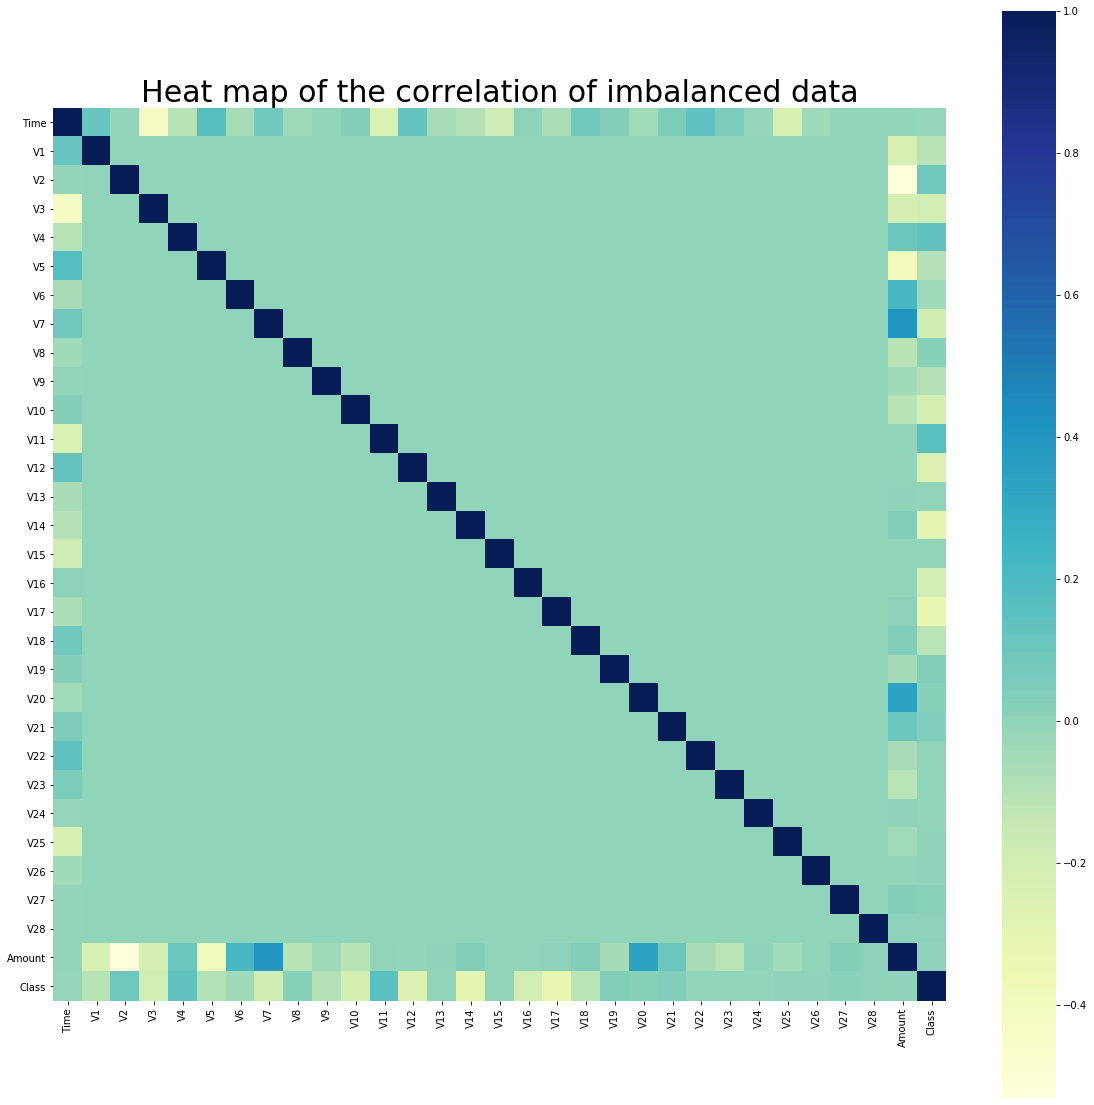

In [22]:
# drawing the correlations heat map before balancing the data base

corr = df.corr()
fig_dims = (20, 20)
fig, ax = plt.subplots(figsize=fig_dims)
sns.heatmap(corr, ax = ax, cmap="YlGnBu", square=True)
ax.set_title("Heat map of the correlation of imbalanced data",fontsize = 30)

In [23]:
#Creating a database full of fradulent transactions 
df_fraud = df.loc[df['Class']==1]
df_fraud.shape

(492, 31)

In [24]:
#Creating a database full of non fradulent transactions 
df_nonfraud = df.loc[df['Class']==0]
df_nonfraud.shape

(284315, 31)

In [25]:
#Creating a database full of non fradulent transactions  with only 492 entries for 50 50 distribution
df_nonfraud = df.loc[df['Class']==0][:492]
df_nonfraud.shape

(492, 31)

In [26]:
# joining both the dataframes
df_balanced = pd.concat([df_fraud,df_nonfraud], axis = 0)
df_balanced.shape

(984, 31)

In [27]:
# shuffling the data frame
df_balanced = df_balanced.sample(frac = 1)
df_balanced.shape

(984, 31)

In [28]:
df_balanced.head()

# the index is all shuffled

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
237107,149096.0,1.184891,3.152084,-6.134780,5.531252,1.733867,-1.816861,-0.916696,0.265568,-3.158014,...,0.124236,-0.823865,-0.079887,0.028828,0.389711,0.060171,0.485187,0.326552,0.00,1
15166,26523.0,-18.474868,11.586381,-21.402917,6.038515,-14.451158,-4.146524,-14.856124,12.431140,-4.053353,...,1.741136,-1.251138,-0.396219,0.095706,1.322751,-0.217955,1.628793,0.482248,99.99,1
241254,150949.0,-2.423535,1.659093,-3.071421,2.588033,1.135791,-1.892388,-2.588418,-2.226592,-1.670173,...,-0.934127,0.922038,-0.180255,-0.281719,0.299285,-0.263801,0.150156,0.292112,9.29,1
237426,149236.0,-1.370976,-0.025465,-2.774907,2.650530,4.511309,-3.289344,-0.118841,-0.014279,-0.932773,...,-0.048061,-0.599350,0.072193,-0.600351,0.371331,-0.370951,0.011970,0.145895,1.00,1
73784,55279.0,-5.753852,0.577610,-6.312782,5.159401,-1.698320,-2.683286,-7.934389,2.373550,-3.073079,...,1.177852,0.175331,-1.211123,-0.446891,-0.405520,-0.165797,1.505516,0.359492,1.00,1


In [29]:
# reseting the index 
# drop = true means dropping the old index

df_balanced.reset_index(inplace = True, drop = True)
df_balanced.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,149096.0,1.184891,3.152084,-6.134780,5.531252,1.733867,-1.816861,-0.916696,0.265568,-3.158014,...,0.124236,-0.823865,-0.079887,0.028828,0.389711,0.060171,0.485187,0.326552,0.00,1
1,26523.0,-18.474868,11.586381,-21.402917,6.038515,-14.451158,-4.146524,-14.856124,12.431140,-4.053353,...,1.741136,-1.251138,-0.396219,0.095706,1.322751,-0.217955,1.628793,0.482248,99.99,1
2,150949.0,-2.423535,1.659093,-3.071421,2.588033,1.135791,-1.892388,-2.588418,-2.226592,-1.670173,...,-0.934127,0.922038,-0.180255,-0.281719,0.299285,-0.263801,0.150156,0.292112,9.29,1
3,149236.0,-1.370976,-0.025465,-2.774907,2.650530,4.511309,-3.289344,-0.118841,-0.014279,-0.932773,...,-0.048061,-0.599350,0.072193,-0.600351,0.371331,-0.370951,0.011970,0.145895,1.00,1
4,55279.0,-5.753852,0.577610,-6.312782,5.159401,-1.698320,-2.683286,-7.934389,2.373550,-3.073079,...,1.177852,0.175331,-1.211123,-0.446891,-0.405520,-0.165797,1.505516,0.359492,1.00,1


In [30]:
df_balanced.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,...,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000
mean,40460.391260,-2.467403,1.905304,-3.083884,2.456780,-1.561726,-0.572584,-2.730903,0.261082,-1.301145,...,0.354898,-0.044481,-0.036529,-0.047380,0.087571,0.026120,0.096182,0.027865,96.224593,0.500000
std,52607.976219,5.407122,3.596109,6.435905,3.042722,4.202692,1.803657,5.863242,4.850081,2.266780,...,2.787267,1.145080,1.148960,0.586683,0.640419,0.468299,1.003732,0.442955,240.142397,0.500254
min,0.000000,-30.552380,-12.114213,-31.103685,-4.515824,-22.105532,-6.406267,-43.557242,-41.044261,-13.434066,...,-22.797604,-8.887017,-19.254328,-2.028024,-4.781606,-1.243924,-7.263482,-2.733887,0.000000,0.000000
25%,167.000000,-2.788129,0.085200,-5.084967,0.345951,-1.692661,-1.442584,-3.060742,-0.170996,-2.222204,...,-0.173785,-0.533915,-0.226458,-0.415078,-0.216776,-0.296613,-0.039310,-0.049952,1.790000,0.000000
50%,383.000000,-0.781327,0.954502,-0.309446,1.383210,-0.390293,-0.510317,-0.433163,0.153493,-0.584912,...,0.093024,-0.028825,-0.050720,0.027849,0.127459,-0.015632,0.065185,0.037457,15.910000,0.500000
75%,75562.250000,0.870308,2.726800,0.934280,4.175332,0.427009,0.233236,0.304743,0.808184,0.114193,...,0.713646,0.440345,0.142884,0.393393,0.456121,0.308815,0.455031,0.217936,93.237500,1.000000
max,170348.000000,2.132386,22.057729,3.772857,12.114672,11.095089,6.474115,5.802537,20.007208,5.436633,...,27.202839,8.361985,5.466230,1.215279,2.208209,3.065576,3.052358,1.779364,3828.040000,1.000000


In [31]:
df_balanced.corr()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,-0.176633,0.227863,-0.365219,0.441040,-0.103839,-0.283806,-0.241602,-0.067636,-0.356338,...,0.055621,0.118234,0.036447,-0.085778,-0.149954,0.022196,-0.059106,0.105158,0.106553,0.766175
V1,-0.176633,1.000000,-0.815273,0.885851,-0.618810,0.871065,0.331246,0.893485,-0.083201,0.667411,...,0.014938,-0.058945,-0.058465,-0.060129,-0.016738,0.055143,0.196408,0.186987,-0.046907,-0.426422
V2,0.227863,-0.815273,1.000000,-0.870190,0.684931,-0.810743,-0.308700,-0.857683,-0.023728,-0.718727,...,0.038856,0.004289,0.162755,-0.020148,0.054761,-0.011322,-0.163782,0.012342,-0.212187,0.478113
V3,-0.365219,0.885851,-0.870190,1.000000,-0.796294,0.852409,0.483934,0.895456,-0.175860,0.795067,...,0.018937,-0.075264,-0.033618,0.027183,-0.041491,-0.005142,0.096974,0.092987,-0.034515,-0.613963
V4,0.441040,-0.618810,0.684931,-0.796294,1.000000,-0.600360,-0.458256,-0.724185,0.113031,-0.818020,...,-0.027290,0.170322,0.033923,-0.078002,-0.090291,0.134909,-0.012749,-0.040933,0.032909,0.685672
V5,-0.103839,0.871065,-0.810743,0.852409,-0.600360,1.000000,0.325918,0.841820,-0.208157,0.678050,...,0.041268,-0.123783,-0.088696,-0.116307,-0.053489,0.037928,0.184453,0.149613,-0.115057,-0.378402
V6,-0.283806,0.331246,-0.308700,0.483934,-0.458256,0.325918,1.000000,0.316023,-0.557619,0.403167,...,0.015802,-0.024981,0.293952,-0.017682,-0.083498,-0.052112,-0.155945,-0.061031,0.171647,-0.457721
V7,-0.241602,0.893485,-0.857683,0.895456,-0.724185,0.841820,0.316023,1.000000,0.083513,0.786806,...,0.038496,-0.145077,-0.103701,-0.037817,0.089075,0.024934,0.236305,0.116872,0.103533,-0.484249
V8,-0.067636,-0.083201,-0.023728,-0.175860,0.113031,-0.208157,-0.557619,0.083513,1.000000,-0.084799,...,-0.116965,0.045279,-0.433348,0.065151,0.234962,0.045091,0.297871,0.005547,0.034383,0.063857
V9,-0.356338,0.667411,-0.718727,0.795067,-0.818020,0.678050,0.403167,0.786806,-0.084799,1.000000,...,0.162835,-0.273676,-0.064009,0.018974,0.068157,-0.114933,0.140779,0.096520,0.016888,-0.564955


In [89]:
# listing out the positive correlation in the balanced dataframe into a df
pos_corr = df_balanced.corr().unstack().sort_values(ascending  = False).drop_duplicates().to_frame()
# reseting the index to bring the indexes into the dataframe
pos_corr.reset_index(inplace = True, drop = False)
pos_corr.rename(columns={'level_0':'variable1','level_1':'variable2',0:'corr',},inplace=True)

In [90]:
# listing out the negative correlation in the balanced dataframe into a df
neg_corr = df_balanced.corr().unstack().sort_values(ascending  = True).drop_duplicates().to_frame()
# reseting the index to bring the indexes into the dataframe
neg_corr.reset_index(inplace = True, drop = False)
neg_corr.rename(columns={'level_0':'variable1','level_1':'variable2',0:'corr',},inplace=True)

Text(0.5, 1, 'Heat map of the correlation of balanced data')

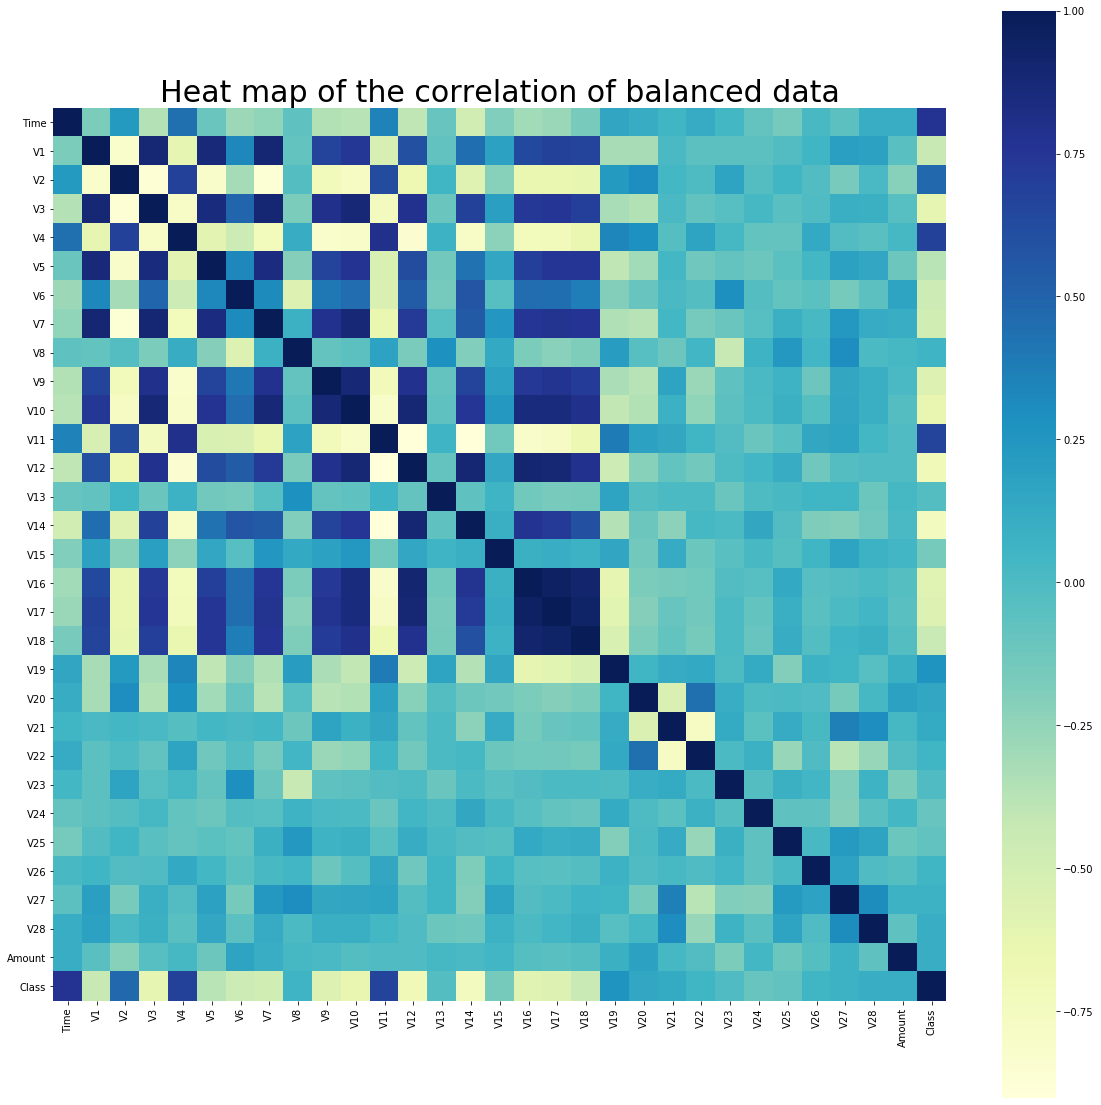

In [92]:
# drawing the correlations heat map after balancing the data base

corr = df_balanced.corr()
fig_dims = (20, 20)
fig, ax = plt.subplots(figsize=fig_dims)
sns.heatmap(corr, ax = ax, cmap="YlGnBu", square=True)
ax.set_title("Heat map of the correlation of balanced data",fontsize = 30)

In [ ]:
# thetop positive correlations are the 